<a href="https://colab.research.google.com/github/Ljut/PSAI-DSAI-datasets/blob/in-progress/VIS25_TIM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadaća 1 – Primijenjena vjerovatnoća i statistika

Tim 1:
**Adnan Muradbegović, Aid Mustafić, Tarik Redžić, Zlatan Ljutika**


---









### Figure 1. Ilustrativni prikaz posvećenosti Tima 1 zadatku






<center><img src="https://i.imgur.com/Fur5grf.jpeg" alt="drawing" width="50%"/></center>



## 1. Uvod u rad; Opis problema i podataka

---



U ovom projektu, analiziramo podatke iz dataseta
[***Freelancer Earnings and Job Trends.***](https://www.kaggle.com/datasets/shohinurpervezshohan/freelancer-earnings-and-job-trends/), koji sadrži *podatke o poslovanju nasumično izabranih freelancera na 5 najpopularnijih platformi.*

**Period prikupljanja podataka:** *14. januar - 29. decembar 2024.*

Konkretno, motiv i cilj ove analize je **izvršiti istraživanje stanja i potreba freelance tržišta u prethodnoj godini,** na osnovu kojeg nastojimo ustanoviti i **iznijeti korisne zaključke za studente koji vrše prve korake u freelancing-u.**


---



Prije početka rada, **nužno je pokrenuti naredni blok koda** , koji učitava potrebne biblioteke i inicijalizira dataset za rad.


In [3]:
#!git clone https://github.com/Ljut/PSAI-DSAI-datasets

import pandas as pd ## Za manipulisanje golih podataka, (CSV, DataFrame,...)
import matplotlib.pyplot as plt ## Za vizualizaciju podataka
import numpy as np ## Za izvršavanje matematičkih operacija nad podacima
from IPython.display import HTML
import seaborn as sns

df = pd.read_csv('freelancer_earnings_bd.csv')

## **Opis analiziranog dataseta:**

Osnovne informacija o datasetu i podacima koje sadrži.

---

Dataset sadržava podatke o zaradi i poslovanju freelancera sa portala *Toptal, Fiverr, PeoplePerHour, Upwork* i *Freelancer.*

* **Broj obrađenih slučajeva** (redova): 1950
* **Broj posmatranih parametara** (kolona): 14 *( + jedinstveni ID freelancera )*



 * **Kategorični podaci:**

  1.   *Job_Category:* **Tip usluge, svrstano u 8 posmatranih kategorija.**
  2.    *Platform:* **Portal na kojem se izvršila usluga. 5 posmatranih kategorija**
  3.  *Experience_Level:* (Subjektivna, objektivna...?) **Procjena iskustva freelancera, svrstano u *Expert, Intermediate* i *Beginner***
  4.  *Client_Region:* **Lokacija klijenta. Svrstano u 7 regija**
  5.   *Payment_Method:* **Način isplate**
  6.  *Project_Type:* **Način poslovanja, po fiksnoj stopi ili satnici.**



  


In [22]:
#@title ####**Tabela 1:** *Kategorički podaci dataseta* { display-mode: "form" }
desc_categorical = df[['Job_Category','Platform','Experience_Level','Client_Region','Payment_Method','Project_Type']].describe().T

desc_categorical['most_common'] = desc_categorical['top'] + ': '+desc_categorical['freq'].astype(str)+'/'+desc_categorical['count'].astype(str)

desc_categorical.drop('count',axis=1,inplace=True); ## Drop podrazumijevano pravi kopiju, inplace djeljuje na pozvani objekt
desc_categorical.drop('top',axis=1,inplace=True);
desc_categorical.drop('freq',axis=1,inplace=True);

desc_categorical['categories'] = df.apply(lambda x: ', '.join(map(str,x.unique()))) ## Output u index "categories": Kategorija1, Kategorija2,..

pd.set_option('display.max_colwidth',None) ## Globalno pravilo, nije prikazivalo sve kategorije u tabelu
html = f"""
<div style="margin-top: 20px;">
  {desc_categorical.to_html(index=False)}
  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 1: Kategorični podaci dataseta
  </p>
</div>
"""
display(HTML(html))

unique,most_common,categories
8,Graphic Design: 265/1950,"Web Development, App Development, Data Entry, Digital Marketing, Customer Support, Content Writing, Graphic Design, SEO"
5,Upwork: 420/1950,"Fiverr, PeoplePerHour, Upwork, Toptal, Freelancer"
3,Beginner: 668/1950,"Beginner, Intermediate, Expert"
7,Australia: 298/1950,"Asia, Australia, UK, Europe, USA, Middle East, Canada"
4,Crypto: 514/1950,"Mobile Banking, Crypto, Bank Transfer, PayPal"
2,Fixed: 997/1950,"Fixed, Hourly"




---


### **Kvantitativni podaci:**
7.    *Earnings_USD*: **Ukupna zarada u USD** *(Američki dolari)*
8.   *Hourly_Rate:* **Satnica freelancera u USD**  *(Američki dolari)*
9. *Job_Success_Rate:* **Postotak uspješno izvršenih usluga. Kriterij posmatranja:** [50%,100%]
10. *Job_Duration_Days:* **Prosječna dužina projekta, u danima**
11.  *Job_Completed:* **Broj uspješno izvršenih usluga**
12. *Client_Rating:* **Prosječna ocjena freelancera od klijenata,** [1.0-5.0]
13.   *Rehire_Rate:* **Postotak klijenata koji odluče ponovno koristiti usluge freelancera**
14. *Marketing_Spend:* **Ukupno uloženo u reklamiranje usluga**




   


In [23]:
#@title ####**Tabela 2:** *Kvantitativni podaci dataseta* { display-mode: "form" }
desc_quantitative = df[['Earnings_USD','Hourly_Rate','Job_Success_Rate','Client_Rating','Rehire_Rate','Marketing_Spend']].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).T


desc_quantitative.drop('count',axis=1,inplace=True); ## Drop podrazumijevano pravi kopiju, inplace djeljuje na pozvani objekt
desc_quantitative.drop('std',axis=1,inplace=True)
desc_quantitative.rename(columns={'10%':'10thPercentile','25%':'1stQuartile','75%':'3rdQuartile','90%':'90thPercentile','50%': 'median'},inplace=True)
pd.set_option('display.max_colwidth',None) ## Globalno pravilo, nije prikazivalo sve kategorije u tabelu


html = f"""
<hr>
<div style="margin-top: 20px;display: flex; justify-content: center;flex-direction:column">

  {round(desc_quantitative,3).to_html(index=False)}

  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 2: Kvantitativni podaci dataseta
  </p>
  <hr>
</div>
"""
display(HTML(html))

mean,min,10thPercentile,1stQuartile,median,3rdQuartile,90thPercentile,max
5017.567,51.00,965.000,2419.000,5048.000,7608.250,9057.600,9991.00
52.580,5.02,15.867,30.048,52.285,75.125,90.562,99.83
74.952,50.16,54.659,61.918,75.400,87.538,94.903,99.99
3.996,3.00,3.189,3.510,3.990,4.500,4.781,5.00
44.557,10.00,16.857,27.150,43.920,61.690,73.035,79.95
248.517,0.00,40.000,119.000,252.500,379.000,452.000,499.00


In [24]:
#@title ####**Tabela 3:** *Primjerak; Prvi deset zapisa podataka u datasetu* { display-mode: "form" }
html = f"""
<hr>
<div style="margin-top: 20px;display: flex; justify-content: center;flex-direction:column">

  {df.head(10).to_html(index=False)}
  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 3: Prvih deset zapisa podataka u datasetu
  </p>

</div>
<hr>
"""

display(HTML(html))

Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489
4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67
5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489
6,Customer Support,Toptal,Beginner,Europe,Crypto,280,6867,43.04,57.80,4.87,8,Fixed,43.88,290
7,Web Development,Fiverr,Beginner,USA,Crypto,96,1677,20.50,52.90,4.29,32,Hourly,45.99,343
8,Data Entry,Toptal,Beginner,Australia,Bank Transfer,112,6193,82.15,93.31,3.84,30,Fixed,31.59,168
9,Content Writing,Toptal,Intermediate,USA,Crypto,233,8446,26.44,80.06,4.27,46,Fixed,50.11,396
10,Data Entry,PeoplePerHour,Beginner,Middle East,Mobile Banking,156,6608,54.99,85.40,4.57,52,Hourly,32.76,160



### **Deskriptivna analiza; Osnovni podaci**

Neke osnovne vizualizacije. Služe za bolje razumijevanje podataka u datasetu.

---

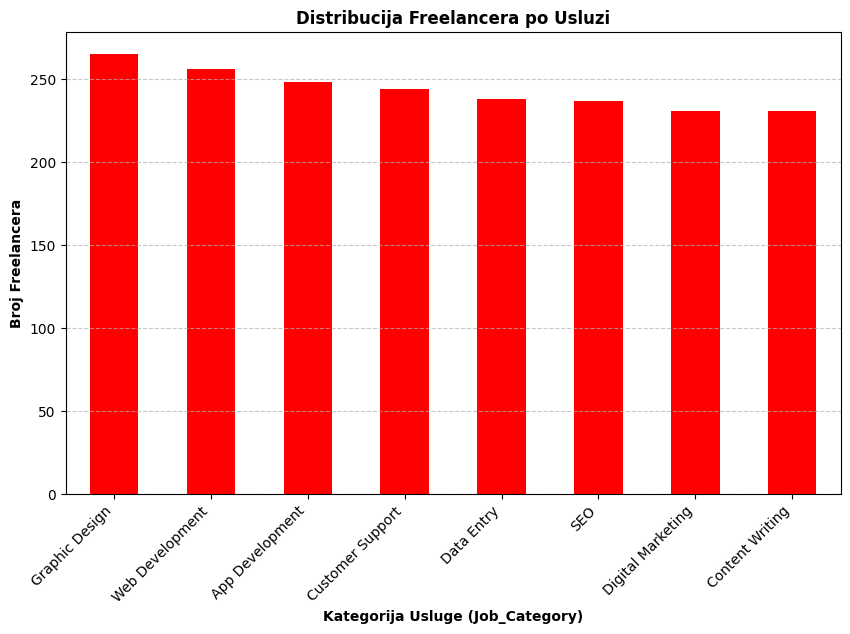

In [25]:
#@title ####**Figura 2:** *Bar-plot vizualizacija distribucije freelancera po tipu usluge* { display-mode: "form" }

plt.figure(figsize=(10,6))
df['Job_Category'].value_counts().plot(kind='bar',color='red')
plt.title('Distribucija Freelancera po Usluzi',fontweight='bold')
plt.xlabel("Kategorija Usluge (Job_Category)",fontweight='bold')
plt.ylabel("Broj Freelancera",fontweight="bold")
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)


**Zaključak posmatranja:** Čak i ako pretpostavimo da podaci dataseta nisu stratificirano izabrani po posmatranom parametru i naizgled, na Figuri 2 **postoji razlika** između zastupljenosti različitih usluga na tržištu *(Grafički dizajn, Web Development kao najzastupljeniji, a Digital Marketing i Content Writing kao najmanje zastupljene usluge)*, **nedovoljno je za generalan i konkretan zaključak, 10% +/- 1%**.

Potrebno je daljnje ispitivanje.

Text(0.5, 1.0, 'Ukupno poslovanje po regiji')

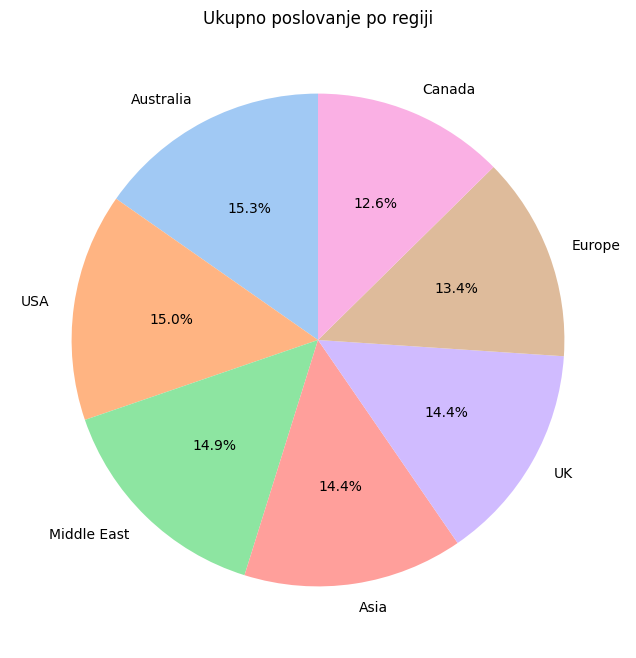

In [26]:
plt.figure(figsize=(8,8))
df['Client_Region'].value_counts().plot(
    kind='pie',autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel')
)
plt.ylabel('')
plt.title('Ukupno poslovanje po regiji')

Text(0.5, 1.0, 'Distribucija zarade freelancera')

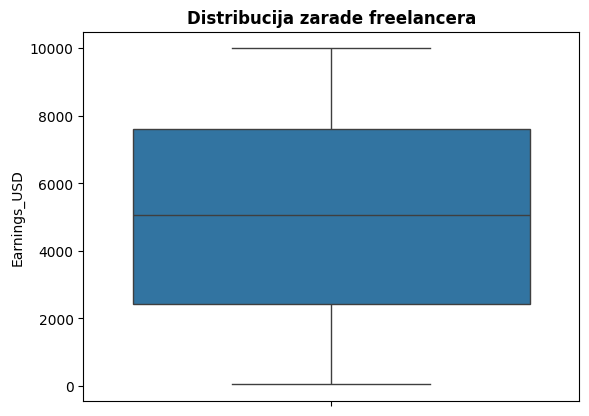

In [27]:
sns.boxplot(data=df, y='Earnings_USD')
plt.title("Distribucija zarade freelancera",fontweight="bold")

<Axes: xlabel='Client_Rating', ylabel='Rehire_Rate'>

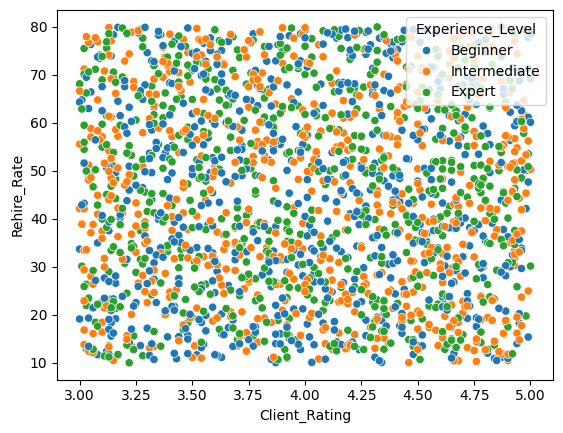

In [28]:
sns.scatterplot(data=df,y='Rehire_Rate',x='Client_Rating',hue='Experience_Level')

<Axes: xlabel='Earnings_USD', ylabel='Count'>

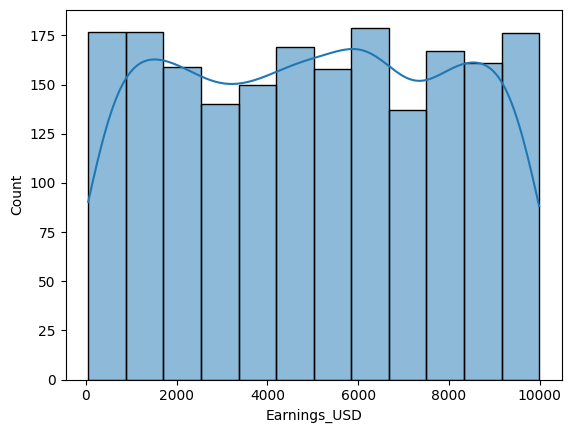

In [30]:
sns.histplot(data=df,x='Earnings_USD',kde=True)

## 3. Vjerovatnoća (Poglavlje 2)

Definišite i izračunajte osnovne i uslovne vjerovatnoće koristeći podatke iz dataseta.

---

### Hipoteza: Iskusniji _freelancer_-i gravitiraju ka platformi Toptal dok oni manje iskusni preferiraju Fiverr

Svako ko se zanima za rad na daljinu u IT industriji, zna da platforma Toptal važi za "elitnu" platformu koja prihvata samo najbolje kandidate kroz rigorozni proces intervjua koji uključuje rješavanje teških algoritamskih problema i ponaša se više kao svojevrstan _head hunter_ za velike firme nego tradicionalna stranica za oglase. S druge strane, platforma Fiverr je poznata po jednostavnosti upotrebe, satnicama od čak samo $5 (odakle dolazi i ime Fiverr) i zasićenosti tržišta.

Bilo bi prirodno zaključiti da su iskusniji _freelancer_-i prisutniji na ekskluzivnim platformama poput Toptal-a, a da oni koji tek ulaze u svijet _freelancing_-a preferiraju pristupačnije platforme.

No, da li se naša hipoteza zasnovana na anegdotalnim dokazima poklapa sa činjenicama o dostupnom uzorku? To možemo zaključiti samo primjenom matematičke teorije vjerovatnoće.

Prvo ćemo izračunati vjerovatnoće da freelancer koristi neku platformu ako mu znamo nivo iskustva i predstaviti ih tablično:

In [11]:
# Vaš kod ovdje

# Ova funkcija ispisuje uvjetnu vjerovatnoću da freelancer koristi neku platformu ako mu znamo nivo iskustva
# Funkciju je napisao GitHub Copilot na osnovu kôda kojeg sam ranije pisao za pojedinačne slučajeve i opisa funkckije koji sam dao u komentaru
def conditional_probability(df, platform, experience_level):
    """
    Izračunava uvjetnu vjerovatnoću da freelancer koristi neku platformu ako mu je poznat nivo iskustva.

    :param df: DataFrame sa podacima o freelancerima
    :param platform: Ime platforme
    :param experience_level: Nivo iskustva
    :return: Uvjetna vjerovatnoća
    """
    # izdvoji instance kod kojih polje "Experience_Level" ima vrijednost "experience_level"
    experience_level_df = df.query(f"Experience_Level == '{experience_level}'")

    # izračunaj vjerovatnoću da freelancer iz uzorka ima vrijednost "experience_level"
    p_platform = len(experience_level_df) / len(df)

    # izdvoji korisnike koji su na nivou "experience_level" a koriste "platform"
    experience_platform_df = experience_level_df.query(f"Platform == '{platform}'")

    # izračunaj vjerovatnoću da je neko i korisnik "platforme" i na nivou "experience_level"
    p_experience_platform = len(experience_platform_df) / len(df)

    # izračunaj uvjetnu vjerovatnoću
    conditional_probability = p_experience_platform / p_platform

    return conditional_probability

matrica = np.zeros((3, 5))
i = 0
for experience_level in {"Beginner", "Intermediate", "Expert"}:
    #print(f"Ispis za platformu '{platform}'")
    j = 0
    for platform in {"Fiverr", "Freelancer", "PeoplePerHour", "Toptal", "Upwork"}:
        matrica[i][j] = conditional_probability(df, platform, experience_level)
        j+=1
    i+=1
        #print(f"Uvjetna vjerovatnoća da freelancer ima nivo iskustva '{experience_level}' ako je korisnik platforme '{platform}': {conditional_probability(df, platform, experience_level)}")
    #print("")

pd.DataFrame(matrica, columns=["P(Fiverr|Experience_Level)", "P(Freelancer|Experience_Level)", "P(PeoplePerHour|Experience_Level)", "P(Toptal|Experience_Level)", "P(Upwork|Experience_Level)"],index=["Beginner", "Intermediate", "Expert"]  )
#df.groupby(["Experience_Level", "Platform"]).size().unstack().plot(kind="bar", stacked=True)

,P(Fiverr|Experience_Level),P(Freelancer|Experience_Level),P(PeoplePerHour|Experience_Level),P(Toptal|Experience_Level),P(Upwork|Experience_Level)
Beginner,0.199688,0.174727,0.224649,0.212168,0.188768
Intermediate,0.191888,0.182527,0.229329,0.195008,0.201248
Expert,0.215569,0.193114,0.193114,0.194611,0.203593


Zbog malih razlika u izračunatim vjerovatnoćama, ne možemo reći da nam tablica mnogo govori o našoj hipotezi. Čak bi se moglo reči da se sa njom donekle i kosi. Naime, vjerovatnoća da početnik koristi TopTal (0.212168) je čak veća od vjerovatnoće da ga koristi ekspert (0.194611) ili srednje iskusan freelancer (0.195008). Također se da primijetiti da je vjerovatnoća da ekspert koristi Fiverr (0.215569) veća u odnosu na vjerovatnoće da ga koristi početnik (0.191688) i srednje iskusan freelancer (0.191888).

Naša hipoteza se, dakle, potpuno obrnula. Možemo se zapitati da li su razne priče o platformama za rad na daljinu uopšte blizu stvarnosti kao i da li je ovaj uzorak zaista reprezentativan (na svijetu postoji mnogo više freelancera od 1950 u ovom uzorku). Razno filozofiranje o dobivenom setu podataka ćemo ipak ostaviti za kraj. Kako se radi o globalnim podacima, moguće ih je razvrstati po regijama. Zbog toga se možemo pitati, da li naša hipoteza ima veću "težinu" (i u smislu da je tačna i u smislu da je netačna) ako se gledaju specifične regije. Možda su neke platforme popularnije u nekim regijama pa se to odražava i na njihovu popularnost među freelancerima različitih nivoa iskustva u određenoj regiji. Možda je nedavna eksplozija neke platforme u zemljama trećeg svijeta dovela do priliva freelancera svih nivoa iskustva na istu. Možda su korisnici TopTala koncentrisani u razvijenijim regijama. Sada ćemo ponoviti sve izračune koje smo izvršili za globalne podatke, ali po regijama. 

Za to ćemo opet koristiti uvjetnu vjerovatnoću, samo ćemo ovoga puta kao uvjet postaviti da se radi o nekom freelanceru koji je određenog nivoa vještine _i_ iz određene regije. Veznik "i" asocira na konjunkciju koja analogon operaciji presjeka skupova  

## 4. Diskretne distribucije (Poglavlje 3)

Izaberite diskretnu varijablu, predložite distribuciju, izračunajte parametre i vjerovatnoće.

---

## Pretpostavka (Hipoteza): Od svih zemalja, u Americi ima najviše klijenata.

# POENTA OVE HIPOTEZE JE POBIJENA SA GORE [figure 2](#figura)

Ovu pretpostavku #ćemo# pokušati dokazati s diskretnom distribucijom vjerovatnoće da je šansa da izvućemo #američkog klijenta# najveća i vizualizirat ćemo podatke #histogramom/bar-plotom#.

In [ ]:
# Vaš kod ovdje


##Pretpostavka (Hipoteza): Postoji profil osobe koja prima kriptovalute kao način plaćanja

# VEĆINA GRAFOVA IMA POGREŠAN NAZIV ŠTA PREDSTAVLJA!!! POPRAVI!!!!

~~Provjerićemo postoji li profil osobe koja prima kriptovalute kao način plaćanja~~

Pogledaćemo kategorije
* Job_Category ✅
* Platform
* Experience_Level
* Client_Region ✅
* Project_Type ✅

I vidjeti možemo li kreirati profil osobe koja prima kriptovalute kao način plačanja
___

Prvo ćemo prikazati diskretnu distribuciju mogućih načina plaćanja i vizualitirati je barplotom.

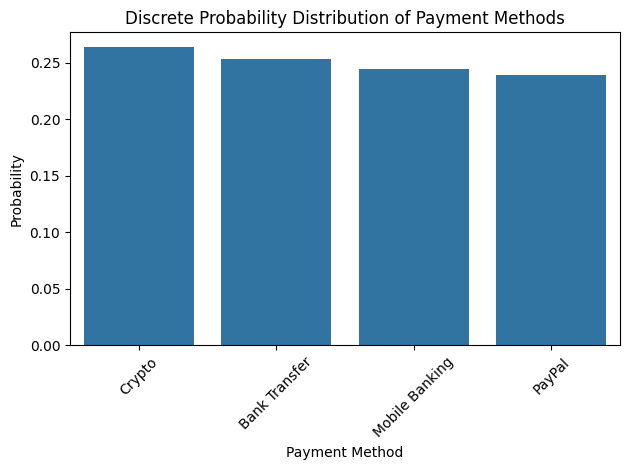

In [ ]:
"""
import plotly.express as px
count_df = df.groupby(['Payment_Method']).size().reset_index(name='Count')

#fig = px.scatter_3d(count_df, x='Payment_Method', y='Client_Region', z='Count')
fig = px.bar(
    count_df,
    x='Payment_Method',
    y='Count',
    color='Payment_Method',  # Different colors for each payment method
    barmode='group',  # Group bars side by side
    title='Client Count by Region and Payment Method',
    labels={'Payment_Method': 'Payment Method Region', 'Count': 'Number of Clients'}
)
fig.show()
"""
# Normalize to get probabilities (sum = 1)
region_probs = df['Payment_Method'].value_counts(normalize=True).reset_index()
region_probs.columns = ['Payment_Method', 'Probability']

sns.barplot(data=region_probs, x='Payment_Method', y='Probability')

plt.title('Discrete Probability Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

~~Interesantno. Iako su prema datasetu dosta ravnomjerno raspoređeni načini plaćanja, najviše se u kriptovalutama izvršavaju tranzakcije. Sad nas zanima u kojoj regiji je najzastupljenije plaćanje u kriptovalutama. Ponovno ću rezultate vizualizirati barplotom.~~<br>
Interesantno je primijetiti da, iako su načini plaćanja u datasetu relativno ravnomjerno raspoređeni, kriptovalute se ipak koriste najčešće za izvršavanje transakcija.

Sada želimo istražiti u kojoj regiji je plaćanje kriptovalutama najzastupljenije.
Rezultate ćemo ponovo prikazati pomoću barplota~~, radi lakšeg poređenja među regionima.~~

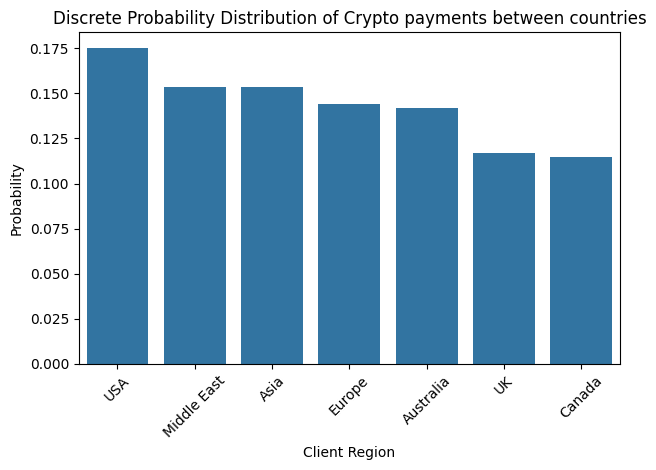

In [ ]:
#
# Normalize to get probabilities (sum = 1)
crypto_region_counts = df[df['Payment_Method'] == 'Crypto']['Client_Region'].value_counts(normalize=True).reset_index()
#print(crypto_region_counts)

#region_probs = df['Payment_Method'].value_counts(normalize=True).reset_index()
crypto_region_counts.columns = ['Client_Region', 'Probability']

sns.barplot(data=crypto_region_counts, x='Client_Region', y='Probability')

plt.title('Discrete Probability Distribution of Crypto payments between countries')
plt.xlabel('Client Region')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Iz grafa možemo zaključiti da, iako je možda ravnomjerno, se  najveći broj tranzakcija u kriptovalutama odvija u Americi. Sad nas zanima kod koje profesije je najzastupljenije plaćanje u kriptovalutama. Prvo ćemo pogledati u svijetu, a onda ćemo pogledati u Americi, pošto su tamo ipak najzastupljenije transakcije s kriptovalutama.

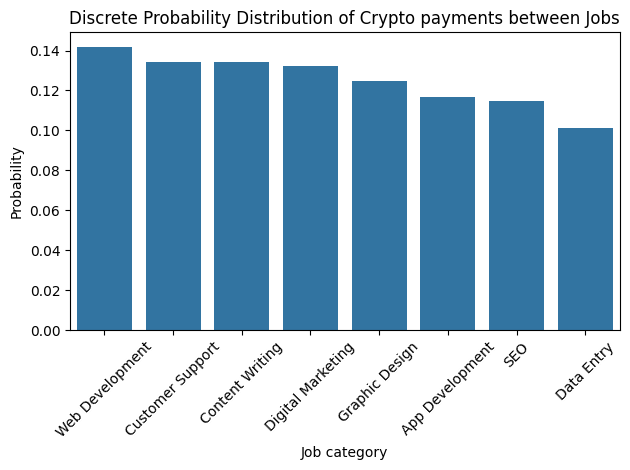

In [ ]:
# Normalize to get probabilities (sum = 1)
crypto_region_counts = df[df['Payment_Method'] == 'Crypto']['Job_Category'].value_counts(normalize=True).reset_index()
#print(crypto_region_counts)

#region_probs = df['Payment_Method'].value_counts(normalize=True).reset_index()
crypto_region_counts.columns = ['Job_Category', 'Probability']

sns.barplot(data=crypto_region_counts, x='Job_Category', y='Probability')

plt.title('Discrete Probability Distribution of Crypto payments between Jobs')
plt.xlabel('Job category')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

########### MRSKO MI SAD
WEB DERE, Ko šiša Data Entry

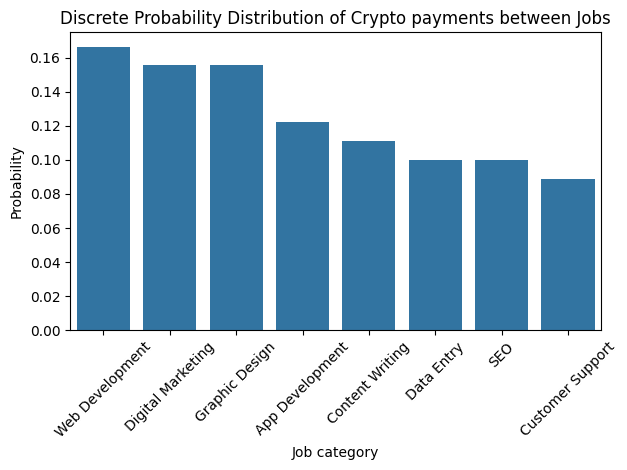

In [ ]:
crypto_region_counts = df[df['Payment_Method'] == 'Crypto']['Job_Category'][df['Client_Region'] == 'USA'].value_counts(normalize=True).reset_index()
#print(crypto_region_counts)

#region_probs = df['Payment_Method'].value_counts(normalize=True).reset_index()
crypto_region_counts.columns = ['Job_Category', 'Probability']

sns.barplot(data=crypto_region_counts, x='Job_Category', y='Probability')

plt.title('Discrete Probability Distribution of Crypto payments between Jobs')
plt.xlabel('Job category')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sad imamo neku iskristalisanu sliku. U web developmentu, digitalnom marketingu i grafičkom dizajnu je najveća vjerovatnoća da je tranzakcija izvršena preko kriptovaluta. Također interesantna stvar koju možemo vidjeti je da je za __#Customer Support#__ najniža vjerovatnoća da je plaćen sa kriptovalutamo u Americi, dok je u svijetu 2. najzastupljeniji. __Ovo opažanje zahtjeva da usporedimo situaciju i u ostatku svijeta.__<br><br>
Pošto se broj usporedbi ~~eksponencijalno~~ ekstremno povećao (Trebaju se usporediti sve kategorije poslova sa svim regijama), koristićemo Heat-map kako bi vidjeli u kojim regijama, koji poslovi najviše koriste kriptovalute za tranzakcije.

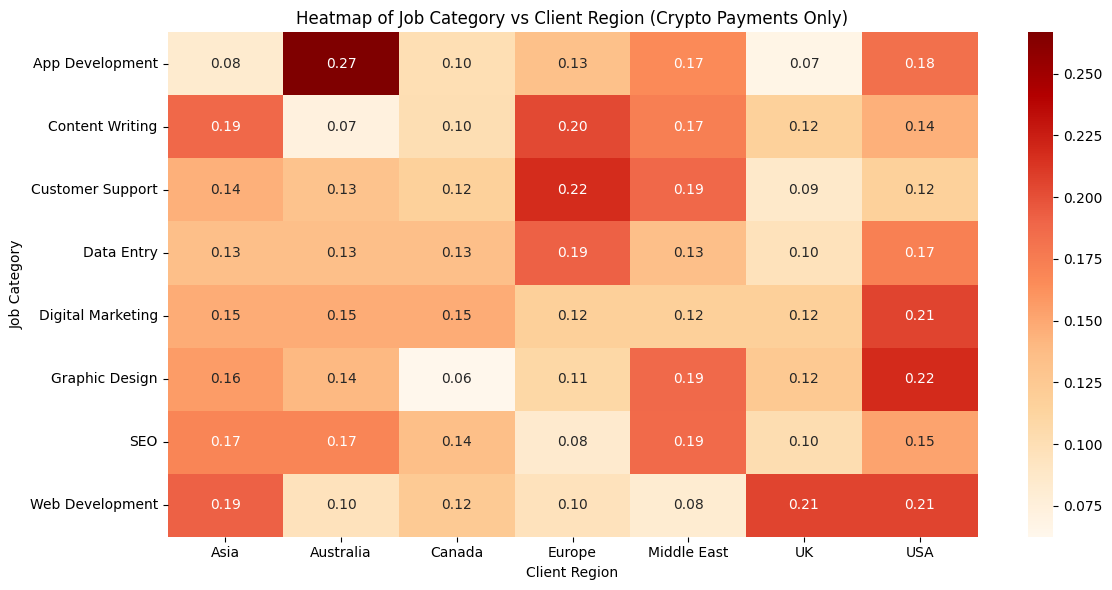

In [ ]:
# Filter the dataset for Crypto payments
crypto_df = df[df['Payment_Method'] == 'Crypto']

# Create the cross-tabulation
heatmap_data = pd.crosstab(crypto_df['Job_Category'], crypto_df['Client_Region'], normalize='index')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='OrRd', fmt='.2f')

plt.title('Heatmap of Job Category vs Client Region (Crypto Payments Only)')
plt.xlabel('Client Region')
plt.ylabel('Job Category')
plt.tight_layout()
plt.show()

Trenutno, ova mapa je kombinacija ~~[ovog](#scrollTo=FI_uO9dsovAE&line=1&uniqifier=1) i [ovog]() boxplotoa.~~ svih dosadašnjih boxplotova (ako zbrojimo sve redove po kolonama, dobićemo [ovaj](#scrollTo=FI_uO9dsovAE&line=1&uniqifier=1) boxplot) i daje potpunu sliku povezanosti plaćanja u kriptovalutama sa kategorijama poslova i regija. ~~i daje potpunu sliku situacije, jer zajedno pokrivaju sve varijable koje trenutno razmatramo.~~ <br>
Ova mapa pokazuje diskretnu distribuciju kategorije posla po regiji (Zbir vjerovatnoća po regijama za određeni posao je 1). ~~Mapa ne uzima u obzir da li neka regija ~~<br>
Mapa pokazuje procentualno koliko se neki posao u nekoj zemlji plaća u kriptovalutama.
######## Komentariši gdje je crveno. Kanade ni na mapi

Dalje treba ispitati da li ljudi koji primaju kriptovalute kao plaću, rade #fiksno ili na sat#. Ovdje nećemo ulaziti u detalje u kojim zemljama preferiraju kako i zašto, __(# Možda da ovo bude nečija tema?#)__ već ćemo samo globalno vidjeti kakva je situacija i pretstaviti obicnim boxplotom.

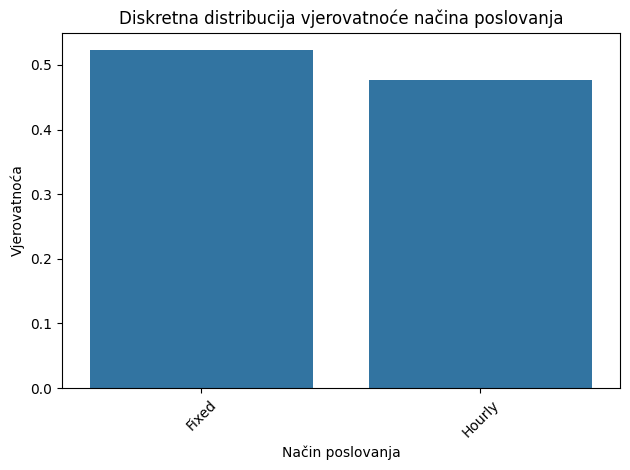

In [ ]:

# Koristim crypto_df. Što se ranije nisam sjetio da koristim dictionary sa samo kriptom?
# Zato nisam
pm_df = df[df['Payment_Method'] == 'Crypto']['Project_Type'].value_counts(normalize=True).reset_index()
pm_df.columns = ['Project_Type', 'Broj']
sns.barplot(data=pm_df, x='Project_Type', y='Broj')

plt.title('Diskretna distribucija vjerovatnoće načina poslovanja')
plt.xlabel('Način poslovanja')
plt.ylabel('Vjerovatnoća')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

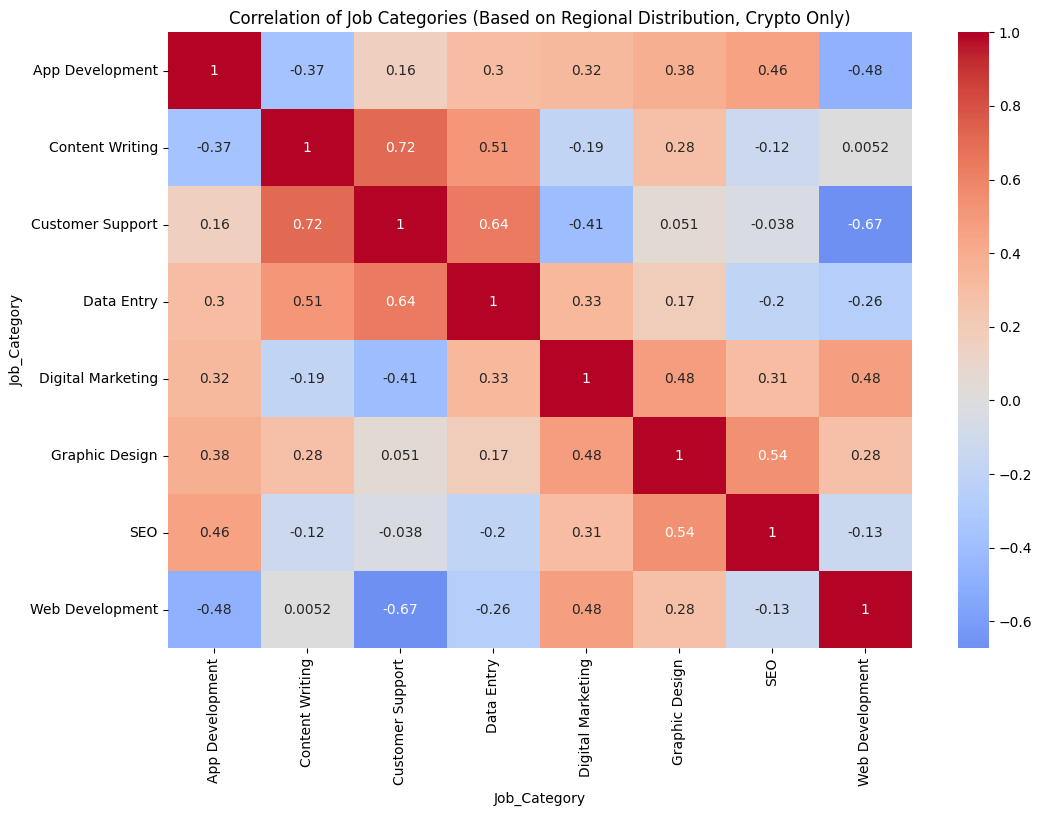

In [ ]:
def nacin1():
  # One-hot encode the categorical variables
  crypto_df = df[df['Payment_Method'] == 'Crypto']
  encoded_df = pd.get_dummies(crypto_df[['Job_Category', 'Client_Region']])

  # Compute correlation matrix
  correlation_matrix = encoded_df.corr()

  # Optional: visualize
  import seaborn as sns
  import matplotlib.pyplot as plt

  plt.figure(figsize=(14, 10))
  sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
  plt.title('Correlation Matrix (One-Hot Encoded Categories)')
  plt.show()

def nacin2():
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt

  # Filter for rows with crypto payment
  crypto_df = df[df['Payment_Method'] == 'Crypto']

  # Step 1: Cross-tabulate counts of Job_Category across Client_Region
  crosstab = pd.crosstab(crypto_df['Job_Category'], crypto_df['Client_Region'])

  # Step 2: Compute correlation across job categories (rows)
  job_corr = crosstab.T.corr()

  # Step 3: Visualize as heatmap
  plt.figure(figsize=(12, 8))
  sns.heatmap(job_corr, annot=True, cmap='coolwarm', center=0)
  plt.title('Correlation of Job Categories (Based on Regional Distribution, Crypto Only)')
  plt.show()

nacin2()


## WTF??

######## Prema grafu, tu je to negdje, Fiksno je malo zastupljenije.<br>
Još mi samo ostaje da ispitam odnos platforme i ekspertnosti ljudi koji primaju platu u kriptu

~~Gledali smo (LAG vibes) prostor regiona, sad ćemo se okrenuti internet prostoru i vidjeti mogu li se~~ <br>
Sljedeće pitanje koliko su stručni ljudi koji naplaćuju u kriptovalutama. To ćemo vidjeti na sljedećem boxplotu.

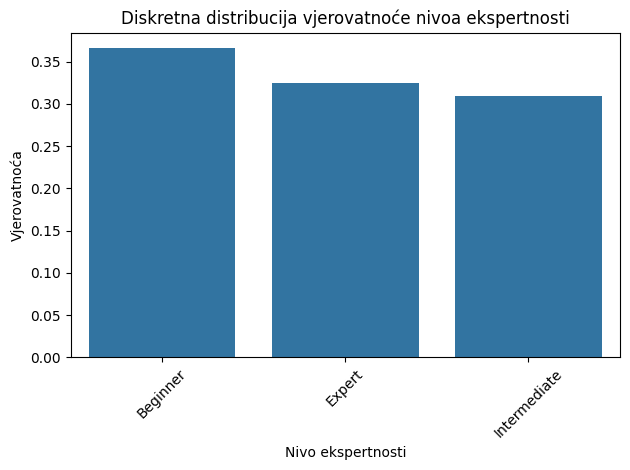

In [ ]:
pm_df = df[df['Payment_Method'] == 'Crypto']['Experience_Level'].value_counts(normalize=True).reset_index()
pm_df.columns = ['Experience_Level', 'Broj']
sns.barplot(data=pm_df, x='Experience_Level', y='Broj')

plt.title('Diskretna distribucija vjerovatnoće nivoa ekspertnosti')
plt.xlabel('Nivo ekspertnosti')
plt.ylabel('Vjerovatnoća')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Možemo vidjeti da je najviše početnika, a najmanje srednjie stručnih ljudi. Ne znam šta bih konkretno mogao iz ovoga zaključiti. Probaću napraviti heatmap nivoa ekspertnosti i načina poslovanja.

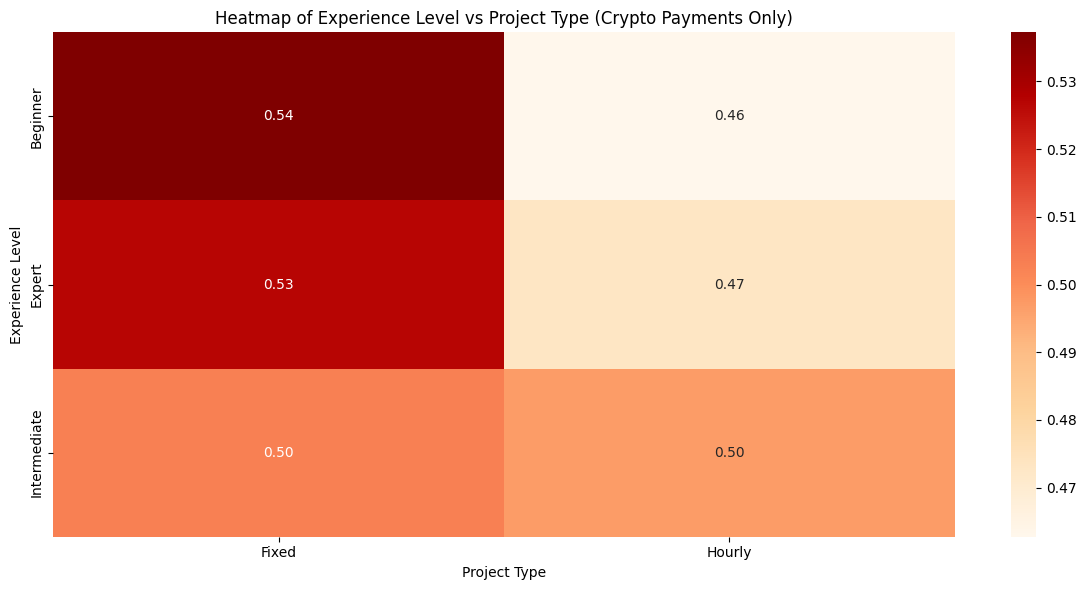

In [ ]:
# Filter the dataset for Crypto payments
crypto_df = df[df['Payment_Method'] == 'Crypto']

# Create the cross-tabulation
heatmap_data = pd.crosstab(crypto_df['Experience_Level'], crypto_df['Project_Type'], normalize='index')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='OrRd', fmt='.2f')

plt.title('Heatmap of Experience Level vs Project Type (Crypto Payments Only)')
plt.ylabel('Experience Level')
plt.xlabel('Project Type')
plt.tight_layout()
plt.show()

Iz heatmape možemo vidjeti da je praktično jednak broj eksperata i početnika koji primaju platu u kriptu. Htio bih bolje pogledati razliku između početnika i eksperata. To ću postići uspoređivanjem

## 5. Kontinuirane distribucije (Poglavlje 4)

Izaberite kontinuiranu varijablu, prilagodite distribuciju i izračunajte vjerovatnoće ili kvantile.

---

Sada ćemo prikazati distribuciju uspješnosti odrađenog posla freelancera vizualizacijom preko box plota, što će nam dati jasniji i intuitivniji uvid u uspješnost freelancera i njihovog postotka završenih poslova.

<Axes: ylabel='Job_Success_Rate'>

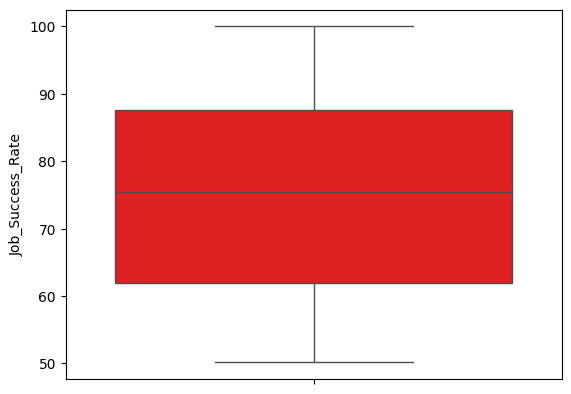

In [ ]:
import seaborn as sns
sns.boxplot(y = 'Job_Success_Rate', data=df,color='red')

In [31]:
description = df.describe()
rename_dict = {
    'count': 'Prostor uzorka',
    'mean': 'Srednja vrijednost',
    'std': 'Standardna devijacija',
    'min': 'Minimum',
    '25%': '25. percentil',
    '50%': 'Median',
    '75%': '75. Percentil',
    'max': 'Maksimum'
}
description = description.rename(index=rename_dict)

display(description['Job_Success_Rate'].round(2))

Prostor uzorka           1950.00
Srednja vrijednost         74.95
Standardna devijacija      14.62
Minimum                    50.16
25. percentil              61.92
Median                     75.40
75. Percentil              87.54
Maksimum                   99.99
Name: Job_Success_Rate, dtype: float64

[Text(0.5, 0, '')]

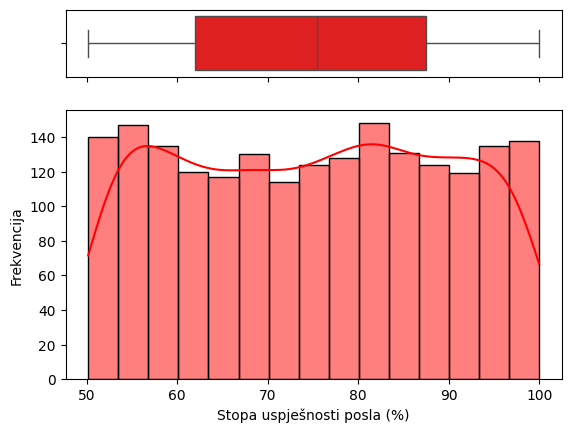

In [ ]:
#sns.histplot(df.Job_Success_Rate, kde=True, bins=50)
#plt.title('Histogram normalne distribucije')
##plt.show()

#plt.figure(figsize=(8, 6))  # Povećava veličinu grafa
#sns.histplot(df.Job_Success_Rate, kde=True, bins=15,color='red')
#plt.title('Distribucija stope uspješnosti posla (Job_Success_Rate)')
#plt.xlabel('Stopa uspješnosti posla (%)')
#plt.ylabel('Frekvencija')
#plt.grid(True, linestyle='--', alpha=0.5)
#plt.show()

import matplotlib.pyplot as plt

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})
sns.boxplot(data=df, x="Job_Success_Rate", ax=ax_box, color='red')
plt.xlabel('Stopa uspješnosti posla (%)')
plt.ylabel('Frekvencija')
sns.histplot(data=df, x="Job_Success_Rate", kde='True', bins = 15, ax=ax_hist, color='red')
ax_box.set(xlabel='')

Ono što možemo da primjetimo iz histograma normalne distribucije i što nam krivulja gustoće prikazuje jeste da je funkcija dosta "ravna" osim pri samim vrijednostima minimuma i maksimuma kada je primjetno da naglo opada iz razloga što se u tim slučajevima vjerovatnoća pojavljivanja naglo smanjuje, dok se kod nas dešava situacija da se frekvencija freelancera sa velikom uspješnošću uopšte ne smanjuje. To nam govori da raspoloživi podaci uopšte nisu normalno distribuisani i da se radi o vrlo neuobičajenom uzorku kojeg analiziramo.

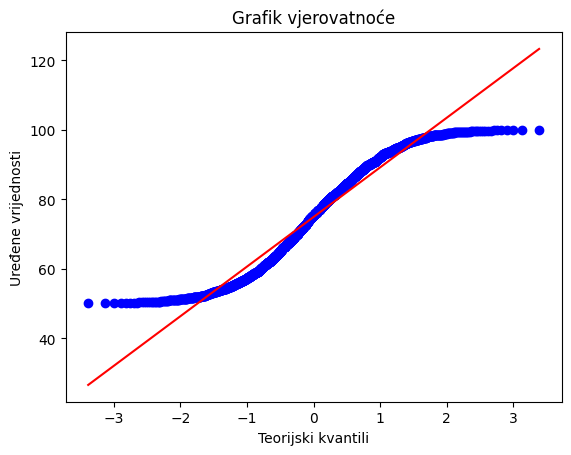

In [ ]:
#provjeri da li je ispravno da ovo koristim u vizualizaciji
import scipy.stats as stats
stats.probplot(df.Job_Success_Rate.dropna(), plot=plt)
plt.title('Grafik vjerovatnoće')
plt.ylabel('Uređene vrijednosti')
plt.xlabel('Teorijski kvantili')
plt.show()

Ovaj grafik vjerovatnoće bi trebao da bude još jedan pokazatelj distribucije analiziranih podataka i njene normalnosti. Vidljiva su velika odstupanja od prave koja predstavlja normalnu distribuciju što dodatno potvrđuje ono što smo mogli vidjeti na histogramu, a to je da radimo sa vrlo "čudnim" podacima.

In [ ]:
#ovo provjeri naknadno sa profesoricom da li je dozvoljeno
from scipy.stats import shapiro
stat, p_value = shapiro(df['Job_Success_Rate'].dropna())
print(f"p-vrijednost = {p_value:.4f}")

p-vrijednost = 0.0000


In [ ]:
uspjesni = df[df['Job_Success_Rate'] >= 95]
count = len(uspjesni)
#i = count/1950 * 100
#print(i)
#round(df.describe(), 1)

In [ ]:
#sns.violinplot(data=df, x="Job_Success_Rate")
#plt.show()

[Text(0.5, 0, '')]

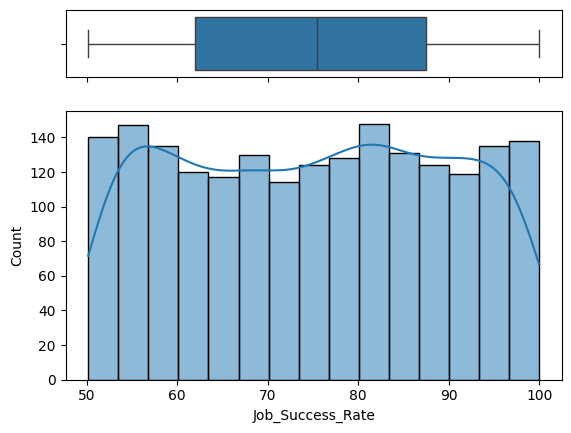

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})
sns.boxplot(data=df, x="Job_Success_Rate", ax=ax_box)
sns.histplot(data=df, x="Job_Success_Rate", kde='True', bins = 15, ax=ax_hist)
ax_box.set(xlabel='')

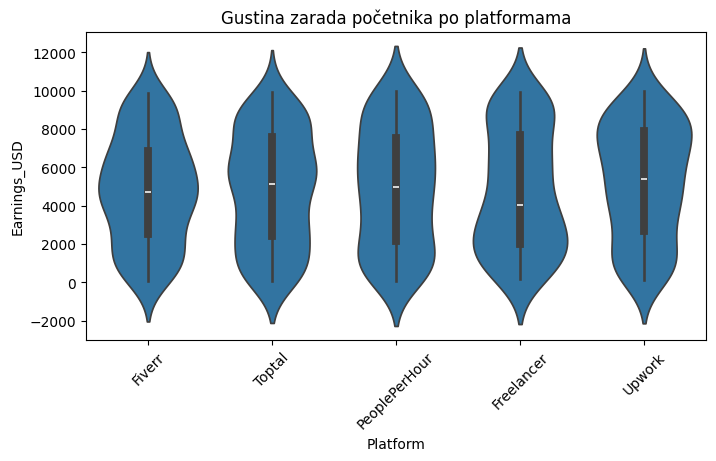

In [36]:
df_pocetnici = df[df['Experience_Level'] == 'Beginner']
plt.figure(figsize=(8, 4))
sns.violinplot(data=df_pocetnici, x='Platform', y='Earnings_USD')
plt.title('Gustina zarada početnika po platformama')
plt.xticks(rotation=45)
plt.show()

### **PITANJE ?**: Da li efikasnost u poslu znači bolje prilike?

Nakon kratke analize podataka i njihove distribucije, sada je vrijeme da proanaliziramo njihove efekte u poslovnom svijetu freelancera. Zanima nas da li oni odgovorniji i vještiji freelanceri imaju bolje prilike u poslovnom svijetu, što kroz vrjednovanje njihovog posla od strane klijenata na način da će ih ponovo zaposliti ili dati veću ocjenu, što će naravno zavisiti i od kvalitete odrađenog posla, što bi također bilo vrijedno prostudirati i vidjeti da li gotov proizvod znači i dobar proizvod.

### **HIPOTEZA**: Efikasni freelanceri imaju zadovoljne, stalne klijente (Veća uspješnost u završavanju poslova znači i veću ocjenu od strane klijenata kao i veću stopu ponovnog zapošljavanja)






## 6. Zajedničke distribucije i zavisnost (Poglavlje 5)

Analizirajte odnose između varijabli koristeći vizualne i numeričke metode.

---

In [ ]:
# Vaš kod ovdje


## 7. Zaključak i refleksija

Sumirajte rezultate, diskutujte uvide i ograničenja, te predložite moguća proširenja.

---

##### experimental

In [ ]:
##from google.colab import sheets
## sheet = sheets.InteractiveSheet(df=description_categorical_data)
## ovaj faktor iznenađenja ostavljam za kasnije

In [ ]:
# Vaš kod ovdje
